# Insurance Fraud Detection
Dataset : __[Click here](https://www.kaggle.com/datasets/nitingoyal8/insurance-dataset)__ 

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Dataset Overview

In [2]:
df = pd.read_csv('insurance_dataset.csv', encoding='unicode_escape')
df.shape

(1000, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Policy_ID             1000 non-null   object 
 1   Customer_Age          1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Policy_Type           1000 non-null   object 
 5   Premium_Amount (USD)  1000 non-null   float64
 6   Claim_Amount (USD)    1000 non-null   float64
 7   Claim_Status          1000 non-null   object 
 8   Number_of_Claims      1000 non-null   int64  
 9   Vehicle_Age           212 non-null    float64
 10  Smoking_Status        382 non-null    object 
 11  Medical_History       297 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [4]:
df.head(10)

,Policy_ID,Customer_Age,Gender,Region,Policy_Type,Premium_Amount (USD),Claim_Amount (USD),Claim_Status,Number_of_Claims,Vehicle_Age,Smoking_Status,Medical_History
0,POL_0001,76,Female,South,Home,1334.50,0.00,Pending,0,NaN,NaN,NaN
1,POL_0002,72,Other,North,Health,1446.53,45619.84,Approved,4,NaN,Smoker,Heart Disease
2,POL_0003,71,Other,North,Travel,2103.51,0.00,Pending,5,NaN,NaN,NaN
3,POL_0004,35,Other,West,Life,2451.76,0.00,Approved,1,NaN,Smoker,Diabetes
4,POL_0005,24,Male,East,Travel,1633.81,9898.76,Approved,1,NaN,NaN,NaN
5,POL_0006,19,Male,South,Auto,3060.57,26007.68,Pending,3,12.0,NaN,NaN
6,POL_0007,25,Other,North,Life,2254.63,6479.02,Pending,5,NaN,Smoker,NaN
7,POL_0008,68,Other,East,Home,4050.49,25662.31,Approved,3,NaN,NaN,NaN
8,POL_0009,38,Other,South,Auto,3101.68,0.00,Approved,2,9.0,NaN,NaN
9,POL_0010,22,Other,West,Home,2534.12,35226.99,Pending,3,NaN,NaN,NaN


In [5]:
df.describe()

,Customer_Age,Premium_Amount (USD),Claim_Amount (USD),Number_of_Claims,Vehicle_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,212.000000
mean,50.031000,2624.573530,17411.490390,2.588000,7.650943
std,18.133308,1361.417183,16979.876271,1.711486,4.478580
min,18.000000,229.330000,0.000000,0.000000,0.000000
25%,34.750000,1444.482500,0.000000,1.000000,4.000000
50%,50.000000,2638.070000,13369.270000,3.000000,7.500000
75%,66.000000,3794.552500,33062.382500,4.000000,11.000000
max,80.000000,4997.920000,49949.580000,5.000000,15.000000


In [6]:
print(df.describe(include=['object']))


       Policy_ID Gender Region Policy_Type Claim_Status Smoking_Status  \
count       1000   1000   1000        1000         1000            382   
unique      1000      3      5           5            3              2   
top     POL_0001  Other   East        Auto     Approved     Non-Smoker   
freq           1    346    222         212          345            195   

       Medical_History  
count              297  
unique               4  
top           Diabetes  
freq                87  


## Data Cleaning


In [7]:
# Checking missing values :
df.isnull().sum()


Policy_ID                 0
Customer_Age              0
Gender                    0
Region                    0
Policy_Type               0
Premium_Amount (USD)      0
Claim_Amount (USD)        0
Claim_Status              0
Number_of_Claims          0
Vehicle_Age             788
Smoking_Status          618
Medical_History         703
dtype: int64

In [8]:
# Finding if there is any duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


In [9]:
# Filling missing values
df['Smoking_Status'].fillna('Unknown', inplace=True)
df['Medical_History'].fillna('No History', inplace=True)



C:\Users\DELL\AppData\Local\Temp\ipykernel_42824\4168386138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking_Status'].fillna('Unknown', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_42824\4168386138.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## Checking Data Distribution 

##### Categorical Features -> Bar Charts

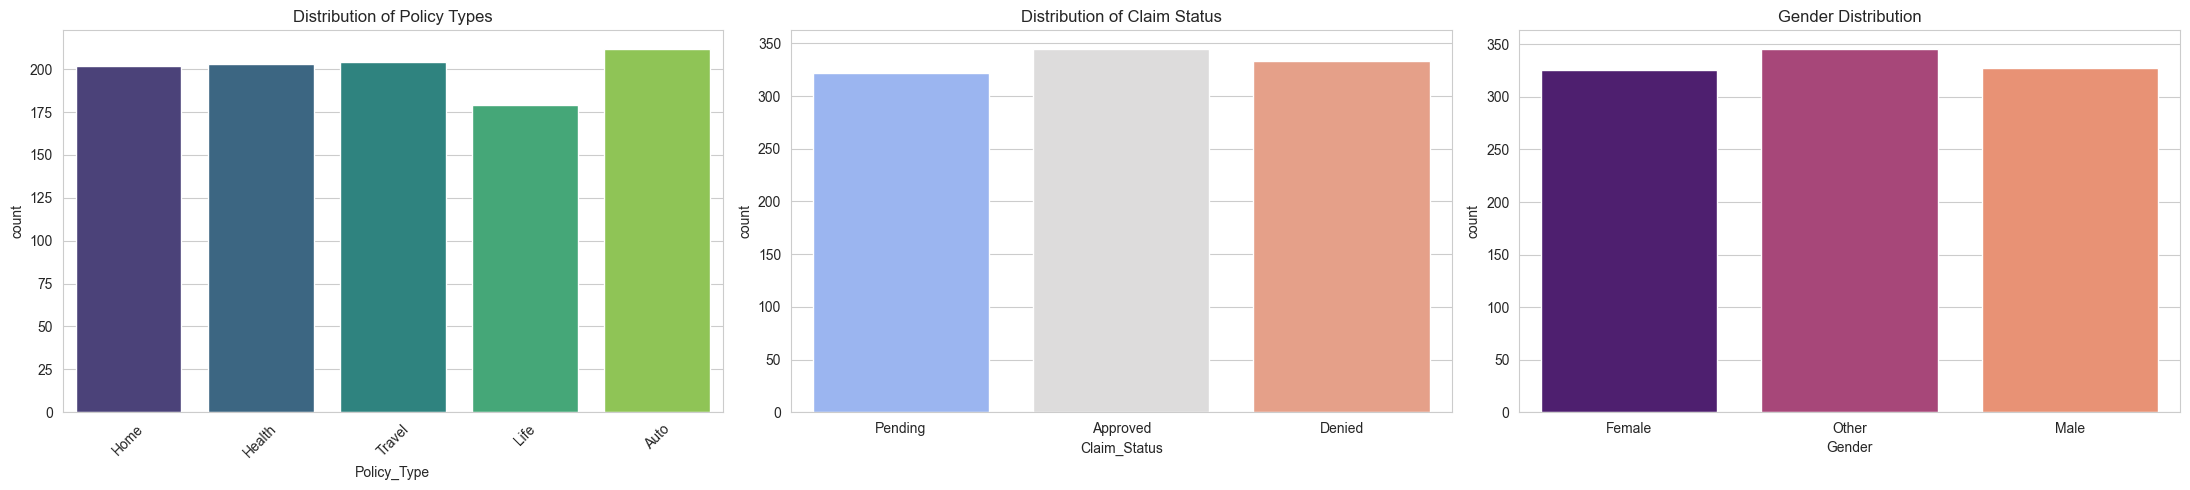

In [27]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(22, 5))

#Policy Type Distribution
sns.countplot(x=df['Policy_Type'], ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Policy Types')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

#Claim Status Distribution
sns.countplot(x=df['Claim_Status'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Distribution of Claim Status')

#Gender Distribution
sns.countplot(x=df['Gender'], ax=axes[2], palette='magma')
axes[2].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

* _The most common policy type is "Auto," followed by "Health" and "Travel."_
* _A relatively high number of denied claims might indicate possible fraud, incomplete documentation, or high-risk applicants_



#### Numerical Features -> Histograms

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


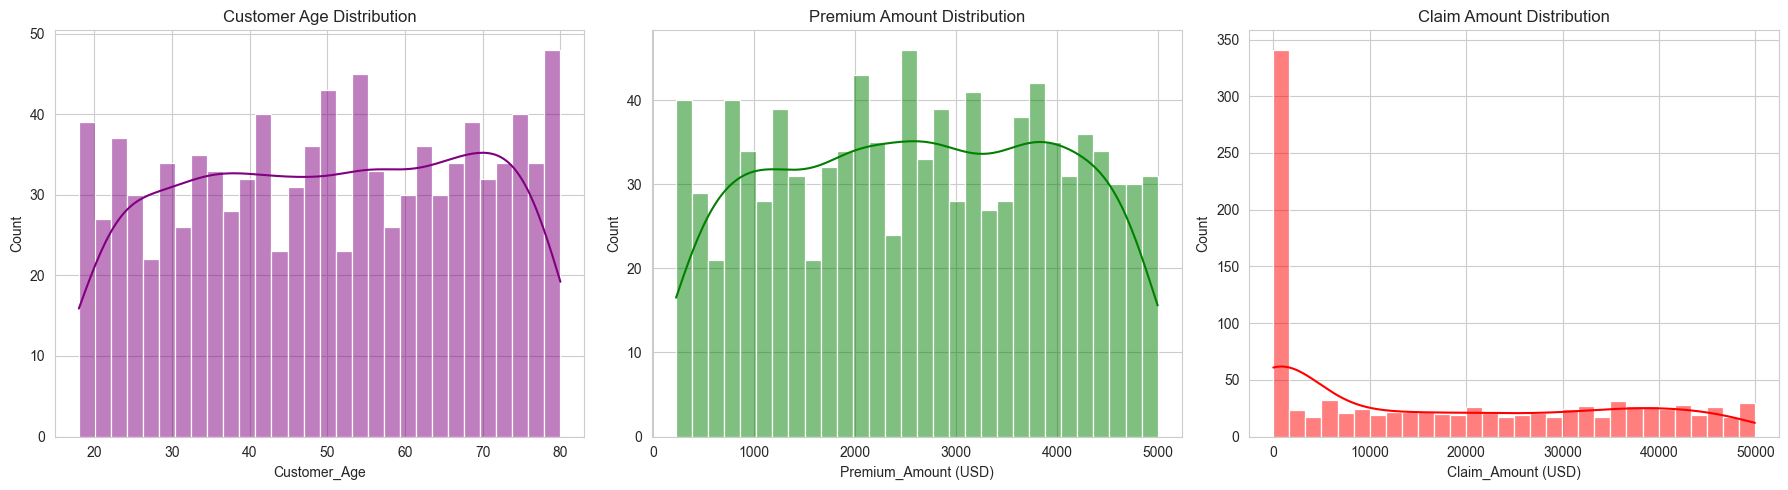

In [11]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Customer_Age'], bins=30, kde=True, ax=axes[0], color='purple')
axes[0].set_title('Customer Age Distribution')

sns.histplot(df['Premium_Amount (USD)'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Premium Amount Distribution')

sns.histplot(df['Claim_Amount (USD)'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Claim Amount Distribution')
plt.tight_layout()
plt.show()

* _The customer ages are fairly evenly distributed but slightly skewed toward older individuals_
* _In premium amount,a slight peak around mid-range premiums (around $2000–$4000)_
* _The claim amounts are highly skewed, with most claims being on the lower end (close to $0–$10,000), but a few large claims reach up to $50,000_

#### Outliers Detection -> Box Plots

Text(0.5, 1.0, 'Boxplot of Premium Amounts')

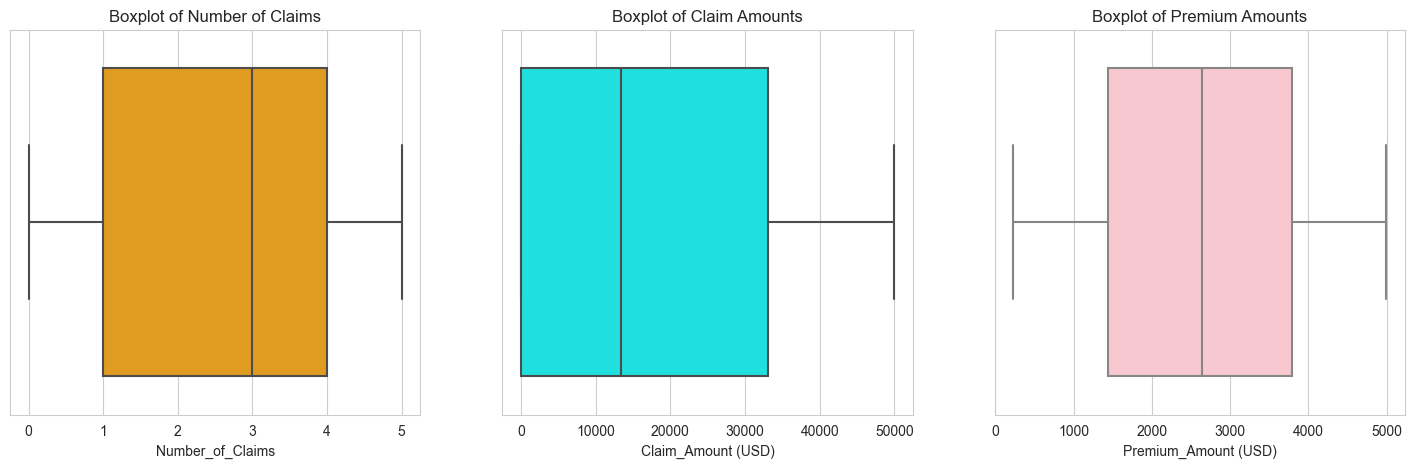

In [12]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x=df['Number_of_Claims'], ax=axes[0], color='orange')
axes[0].set_title('Boxplot of Number of Claims')

sns.boxplot(x=df['Claim_Amount (USD)'], ax=axes[1], color='cyan')
axes[1].set_title('Boxplot of Claim Amounts')

sns.boxplot(x=df['Premium_Amount (USD)'], ax=axes[2], color='pink')
axes[2].set_title('Boxplot of Premium Amounts')

_The claim amount distribution is highly skewed, meaning a few high-value claims exist_

### Vehicle age for policy type = 'Auto'

In [28]:
auto_policies = df[df['Policy_Type'] == 'Auto']

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


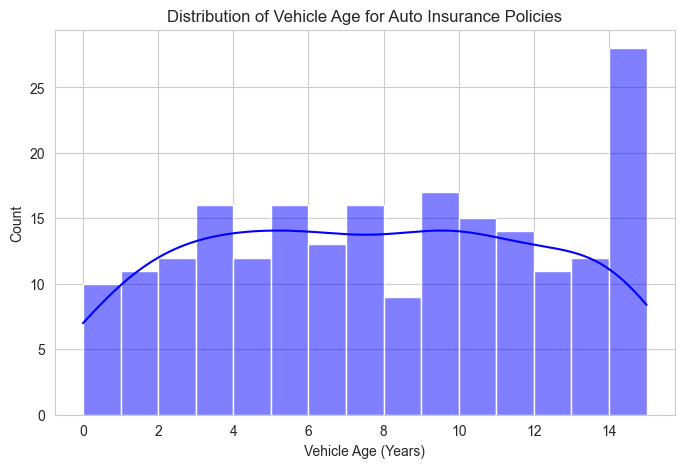

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(auto_policies['Vehicle_Age'], bins=15, kde=True, color='blue')
plt.title('Distribution of Vehicle Age for Auto Insurance Policies')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Count')
plt.show()

### Smoking status for policy_type = 'Health'

In [30]:
health_policies = df[df['Policy_Type'] == 'Health']

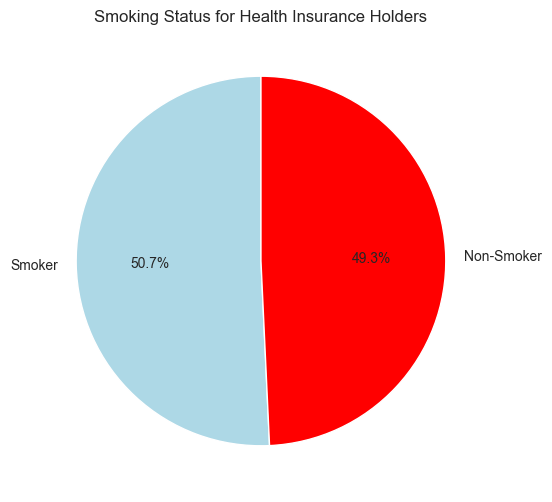

In [31]:
plt.figure(figsize=(6, 6))
health_policies['Smoking_Status'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['lightblue', 'red', 'gray'], startangle=90)
plt.title('Smoking Status for Health Insurance Holders')
plt.ylabel('')
plt.show()

#### Correlation Heatmap for Numerical Features

In [13]:
numerical_data = df.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                      Customer_Age  Premium_Amount (USD)  Claim_Amount (USD)  \
Customer_Age              1.000000              0.011511           -0.055487   
Premium_Amount (USD)      0.011511              1.000000            0.014923   
Claim_Amount (USD)       -0.055487              0.014923            1.000000   
Number_of_Claims          0.050051             -0.001588           -0.014470   
Vehicle_Age              -0.066602             -0.046121            0.002710   

                      Number_of_Claims  Vehicle_Age  
Customer_Age                  0.050051    -0.066602  
Premium_Amount (USD)         -0.001588    -0.046121  
Claim_Amount (USD)           -0.014470     0.002710  
Number_of_Claims              1.000000    -0.101587  
Vehicle_Age                  -0.101587     1.000000  


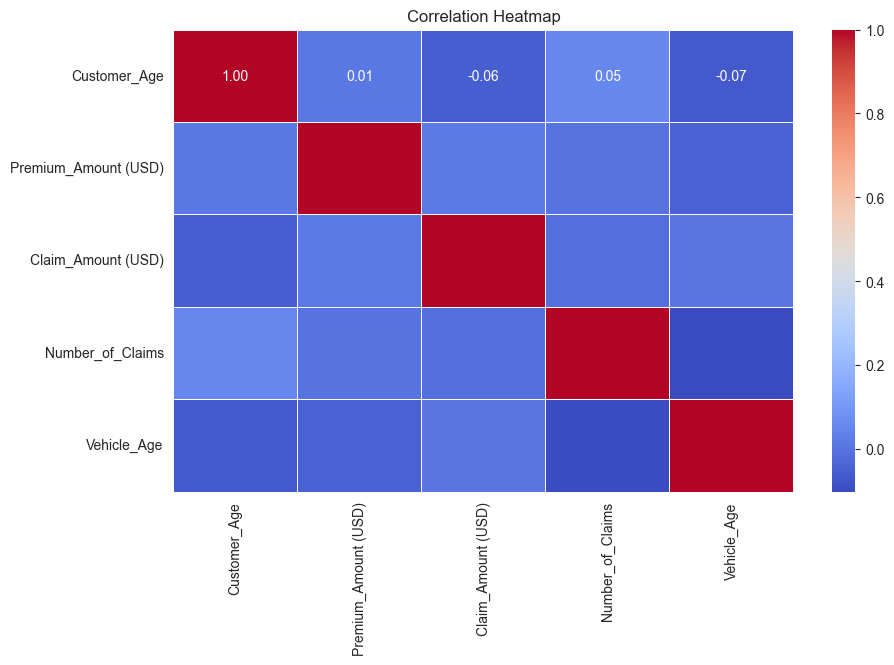

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

_The correlation between features is weak_

# Investigating Denied Claims

Distribution of Policy Types for Denied Claims

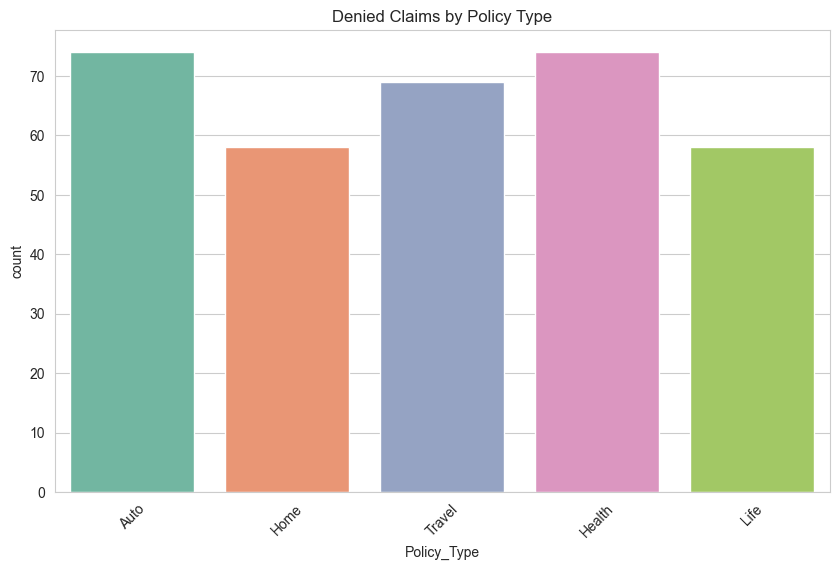

In [15]:
denied_claims = df[df['Claim_Status'] == 'Denied']

# Distribution of Policy Types for Denied Claims
plt.figure(figsize=(10, 6))
sns.countplot(x=denied_claims['Policy_Type'], palette='Set2')
plt.title('Denied Claims by Policy Type')
plt.xticks(rotation=45)
plt.show()



_The most denied claims for policy type 'Auto', followed by 'Health' and 'travel'. (Though they are most common policy also)_

#### Distribution of Smoking Status for Denied Claims who have Health insurance type

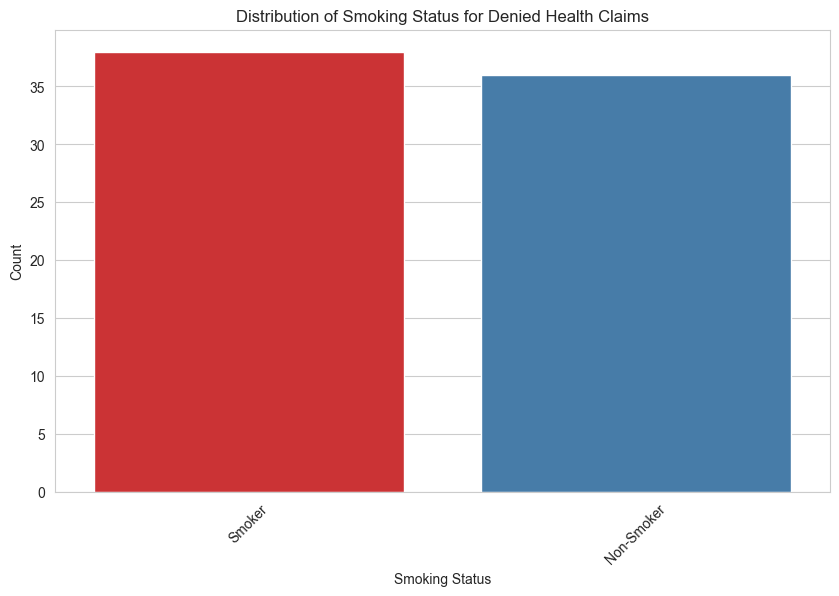

In [33]:
# Distribution of Smoking Status for Denied Claims
denied_health_claims = denied_claims[denied_claims['Policy_Type'] == 'Health']

# Plot Smoking Status distribution for denied Health insurance claims
plt.figure(figsize=(10, 6))
sns.countplot(x=denied_health_claims['Smoking_Status'], palette='Set1')

# Titles and labels
plt.title('Distribution of Smoking Status for Denied Health Claims')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### Denied Claims by Vehicle Age who have Auto Insurance

In [36]:
auto_denied_claims = df[(df['Policy_Type'] == 'Auto') & (df['Claim_Status'] == 'Denied')]


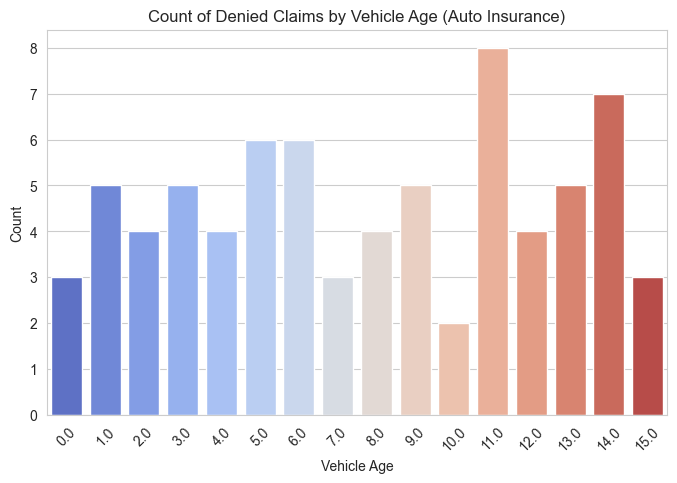

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=auto_denied_claims['Vehicle_Age'], palette='coolwarm')
plt.title('Denied Claims by Vehicle Age (Auto Insurance)')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Denied Claim by Age groups

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


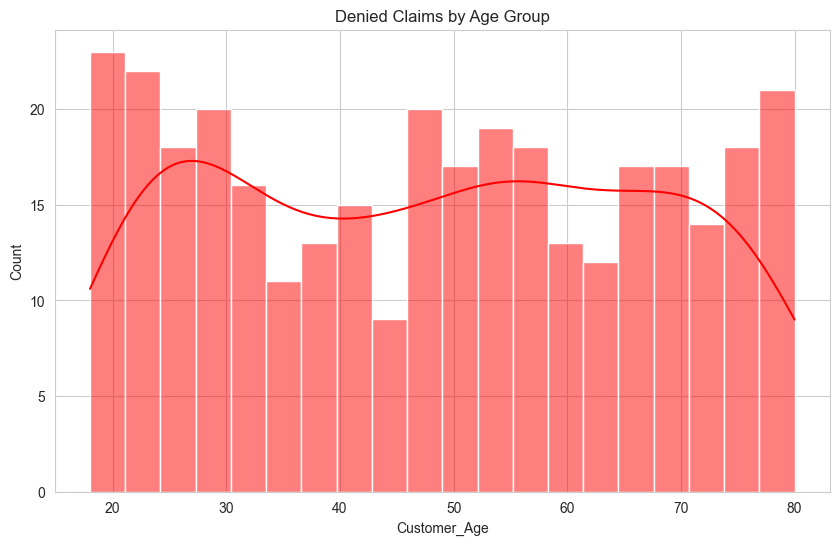

In [17]:
#Denied Claims by Age Group
plt.figure(figsize=(10, 6))
sns.histplot(denied_claims['Customer_Age'], kde=True, bins=20, color='red')
plt.title('Denied Claims by Age Group')
plt.show()